### Name - Tazmeen Afroz
### Class & Section - BAI-4A
### Lab Task -9

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

#1. Load the iris dataset using scikit-learn library.
iris = datasets.load_iris()
print(iris.feature_names)

#2. Create a Pandas DataFrame with the dataset and add column names.
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris['target']


print(iris_df.head())

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [2]:
# 3. Convert the problem into a binary classification problem by only considering two classes and removing the third one.

# removing the first class (0) 
# versicolor and virginica
iris_df = iris_df.drop(iris_df[iris_df['target'] == 0].index)
iris_df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df2['target'] = iris['target']
# removing the third class (2)
# setosa and versicolor
iris_df2 = iris_df2.drop(iris_df2[iris_df2['target'] == 2].index)
print(iris_df)
print(iris_df2)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                 7.0               3.2                4.7               1.4   
51                 6.4               3.2                4.5               1.5   
52                 6.9               3.1                4.9               1.5   
53                 5.5               2.3                4.0               1.3   
54                 6.5               2.8                4.6               1.5   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
50        1  

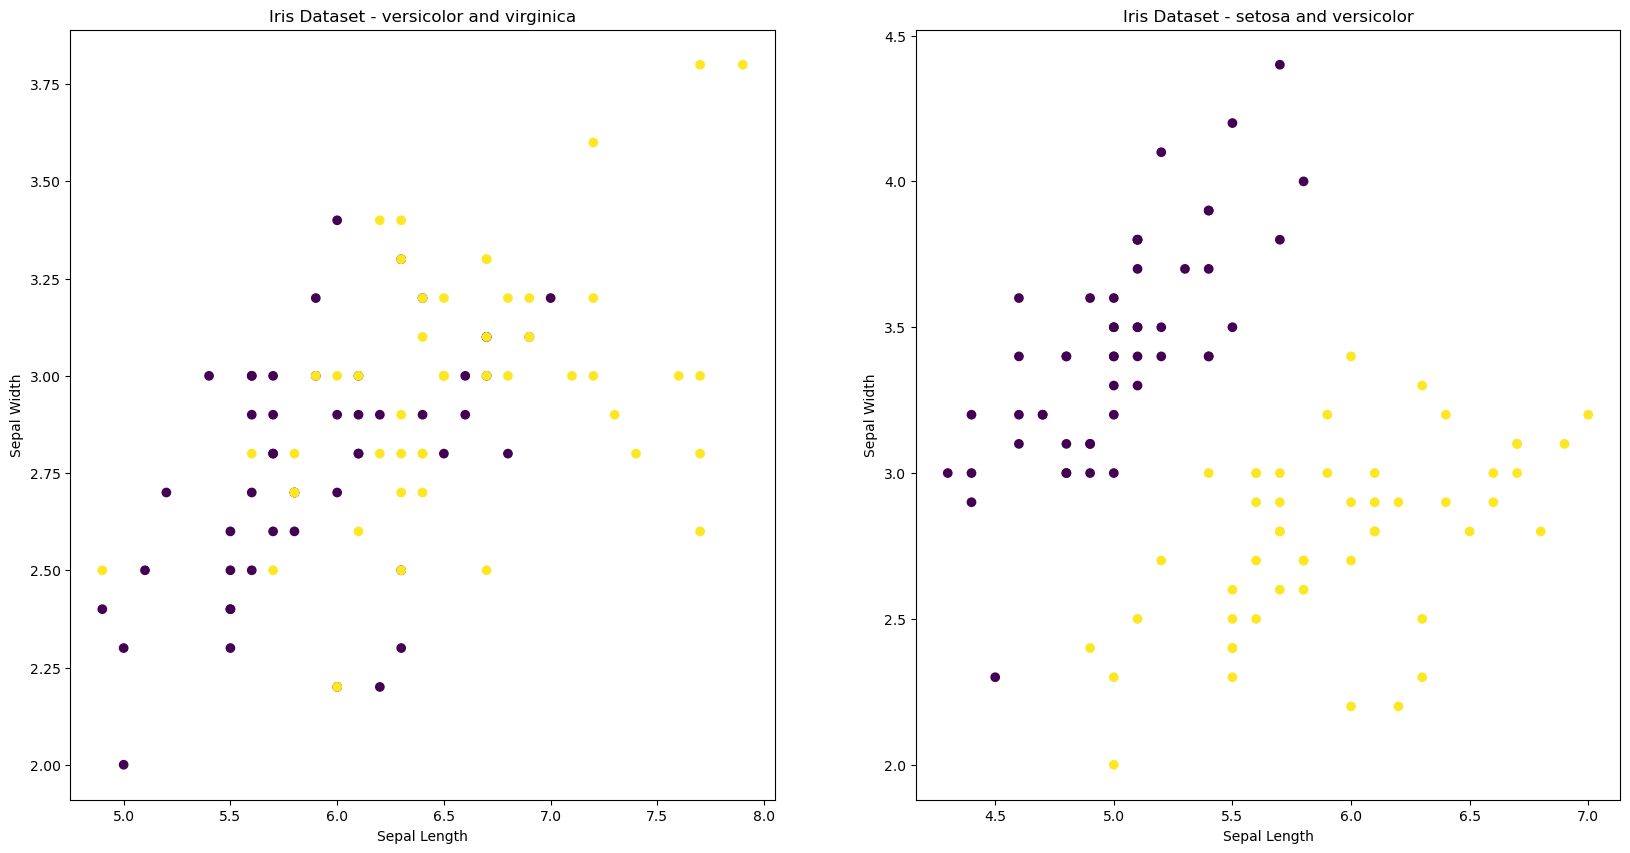

In [3]:
# Visualize the data
import matplotlib.pyplot as plt


# sub plot
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - versicolor and virginica')
plt.subplot(1, 2, 2)
plt.scatter(iris_df2['sepal length (cm)'], iris_df2['sepal width (cm)'], c=iris_df2['target'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset - setosa and versicolor')

plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 4. Remove the target column from the train and test sets.
X = iris_df.drop('target', axis=1)
y = iris_df['target']

X2 = iris_df2.drop('target', axis=1)
y2 = iris_df2['target']

# 5. Split the dataset into training and testing sets.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)



(70, 4)
(30, 4)


In [5]:
# 6. Apply the built-in Perceptron algorithm from scikit-learn.
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

## ann versicolor and virginica
ann=Perceptron(eta0=0.1,max_iter=500)
ann.fit(X_train,y_train)
y_pred=ann.predict(X_test)

# ann of setosa and versicolor
ann2=Perceptron(eta0=0.1,max_iter=500)
ann2.fit(X_train2,y_train2)
y_pred2=ann2.predict(X_test2)

print("Versicolor and Virginica")
print('Accuracy:',accuracy_score(y_test,y_pred))
print('F1:',f1_score(y_test,y_pred))
print('Precision:',precision_score(y_test,y_pred))
print('Recall:',recall_score(y_test,y_pred))


print("Setosa and Versicolor")
print('Accuracy 2:',accuracy_score(y_test2,y_pred2))
print('F1 2:',f1_score(y_test2,y_pred2))
print('Precision 2:',precision_score(y_test2,y_pred2))
print('Recall 2:',recall_score(y_test2,y_pred2))

Versicolor and Virginica
Accuracy: 0.9333333333333333
F1: 0.9375
Precision: 1.0
Recall: 0.8823529411764706
Setosa and Versicolor
Accuracy 2: 1.0
F1 2: 1.0
Precision 2: 1.0
Recall 2: 1.0


In [6]:

# 7. Implement the Perceptron algorithm from scratch.

def train_weights(train, l_rate, n_epoch):
    
    weights = [0.0 for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        
        sum_error = 0.0
        
        for row in train:
            
            prediction = predict(row, weights)
            
            error = row[-1] - prediction
            
            sum_error += error**2
            
            weights[0] = weights[0] + l_rate * error  #bias(t+1) = bias(t) + learning_rate * (expected(t) - predicted(t))
            
            for i in range(len(row)-1):
                
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i] #w(t+1) = w(t) + learning_rate * (expected(t) - predicted(t)) * x(t)
                
        # print('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        
    return weights

def predict(row, weights):
#     bias value at weights[0]
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Define the learning rate and number of epochs
l_rate = 0.01
n_epoch = 1000

# Train the model on the training data
weights = train_weights(X_train.values, l_rate, n_epoch)

# Make predictions on the test data
y_pred = [predict(row, weights) for row in X_test.values]

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Scratch Implementation")
print("Verginica and Versicolor")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)




Scratch Implementation
Verginica and Versicolor
Accuracy: 0.5666666666666667
Precision: 0.5666666666666667
Recall: 1.0
F1 Score: 0.7234042553191489


In [7]:


weights2 = train_weights(X_train2.values, l_rate, n_epoch)

# Make predictions on the test data
y_pred2 = [predict(row, weights2) for row in X_test2.values]

# Calculate the evaluation metrics
accuracy2 = accuracy_score(y_test2, y_pred2)
precision2 = precision_score(y_test2, y_pred2)
recall2 = recall_score(y_test2, y_pred2)
f12 = f1_score(y_test2, y_pred2)

print("Setosa and Versicolor")
print("Accuracy 2:", accuracy2)
print("Precision 2:", precision2)
print("Recall 2:", recall2)
print("F1 Score 2:", f12)




Setosa and Versicolor
Accuracy 2: 0.6666666666666666
Precision 2: 0.5652173913043478
Recall 2: 1.0
F1 Score 2: 0.7222222222222222
